In [1]:
"""Chapter 11, PCA parctise MNIST dataset"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = "/home/jovyan/work/resources/datasets/MNIST/"
inputfile="train.csv"

In [2]:
df_read = pd.read_csv(path+inputfile)

In [3]:
#top15k=df_read.head(15000)

In [4]:
#top15k

In [5]:
l=df_read["label"]
d=df_read.drop("label",axis=1)
d

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


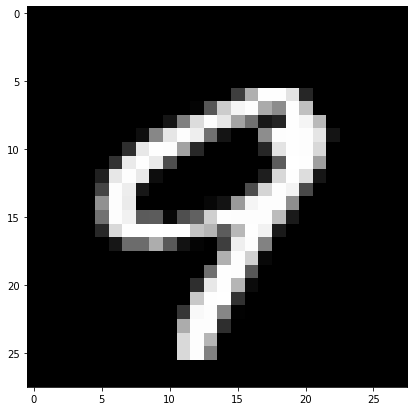

9


In [7]:
plt.figure(figsize=(7,7))
idx=100
grid_data=d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()
print(l[idx])


# Chapter 12

In [8]:
labels=l.head(15000)
data=d.head(15000)
print("The shape of sample data=",data.shape)
print(labels)

The shape of sample data= (15000, 784)
0        1
1        0
2        1
3        4
4        0
        ..
14995    1
14996    4
14997    8
14998    9
14999    6
Name: label, Length: 15000, dtype: int64


In [9]:
#Data preprocessing:Standardization
from sklearn.preprocessing import StandardScaler
standardizer_data=StandardScaler().fit_transform(data)
'''Stardization of data (standard normal distribution) for mean=0 and sigma=1'''
print(standardizer_data.shape)

(15000, 784)


In [10]:
#COmpute co-variance matrix:A^T * A
sample_data=standardizer_data
covar_mat= np.matmul(sample_data.T,sample_data)
print(covar_mat.shape)

(784, 784)


# Compute eigen values and eigen vectors

In [11]:
from scipy.linalg import eigh
#eigh computes eigen values and sorts in increases order
values, vectors=eigh(covar_mat,eigvals=(782,783)) #782,783 represents index of top 2 eigne values 
print("Shape of eigen vectors=",vectors.shape)
vectors=vectors.T #for easy commputation

print("Updated shape of eigen vectors=",vectors.shape)

Shape of eigen vectors= (784, 2)
Updated shape of eigen vectors= (2, 784)


In [12]:
#Project of data with only with top 2 dimensions
import matplotlib.pyplot as plt
new_coordinated=np.matmul(vectors,sample_data.T)

print("Resultant new data points shape=",vectors.shape,'X',sample_data.T.shape,'=',new_coordinated.shape)
print(labels.shape)

Resultant new data points shape= (2, 784) X (784, 15000) = (2, 15000)
(15000,)


In [13]:
import pandas as pd
#appending labels to the 2d projected data
new_coordinated=np.vstack((new_coordinated, labels)).T
#creating a new dataframe for ploting the labeled points
dataframe=pd.DataFrame(data=new_coordinated,columns=("1st_principal","2nd_principal","label"))
print(dataframe.head())
    

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


# Ploting the 2d data using seaborn

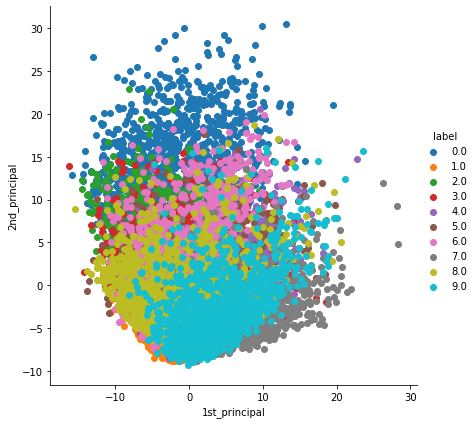

In [14]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label",size=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()

# Direct method to compute PCA sklearn 

In [15]:
from sklearn import decomposition
pca=decomposition.PCA()

In [16]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
print("shape of pca_reduce.shape=",pca_data.shape)

shape of pca_reduce.shape= (15000, 2)


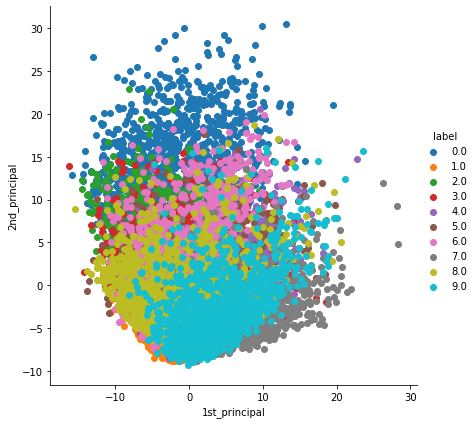

In [17]:
pca_data=np.vstack((pca_data.T,labels)).T
pca_df=pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))
sn.FacetGrid(dataframe, hue="label",size=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()


# t-SNE for MNIST dataset

In [20]:
from sklearn.manifold import TSNE
data_1000=standardizer_data[0:1000,:]
labels_1000=labels[0:1000]
#print(labels_1000)
model=TSNE(n_components=2,random_state=0)
#Default parameters
#noof components=2, perplexity=30,learning rate=200,noof steps=1000
tsne_data=model.fit_transform(data_1000)

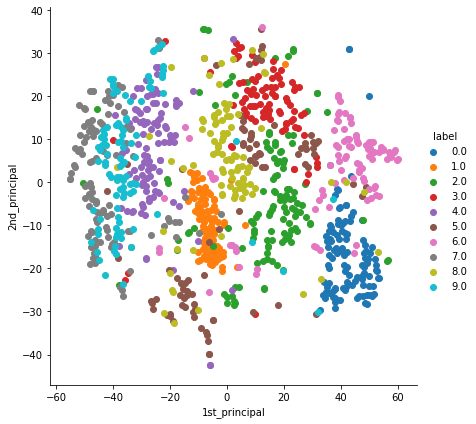

In [21]:
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("1st_principal","2nd_principal","label"))
sn.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()

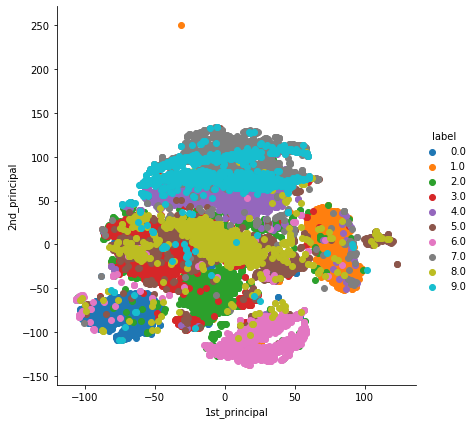

In [22]:
data_15000=standardizer_data[0:15000,:]
labels_15000=labels[0:15000]
#print(labels_1000)
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
#Default parameters
#noof components=2, perplexity=30,learning rate=200,noof steps=1000
tsne_data=model.fit_transform(data_15000)
tsne_data=np.vstack((tsne_data.T,labels_15000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("1st_principal","2nd_principal","label"))
sn.FacetGrid(tsne_df, hue="label",size=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()

# Run for 42k dataset. 


# Please do standardisation before running. Because we have standardised only for 15k dataset values. Vary perplexity for 50 to 15000 with step size of 4000,